In [5]:
GPU_PKG_NAME = "AMDGPU"; include("common_definitions.jl");

Let's draw a Julia Set with Julia and GPUs! Shamelessly borrowed from https://nextjournal.com/sdanisch/julia-gpu-programming

In [2]:
function juliaset(z0, maxiter)
    c = ComplexF32(-0.5, 0.75)
    z = z0
    for i in 1:maxiter
        abs2(z) > 4f0 && return (i - 1) % UInt8
        z = z * z + c
    end
    return maxiter % UInt8 # % is used to convert without overflow check
end

juliaset (generic function with 1 method)

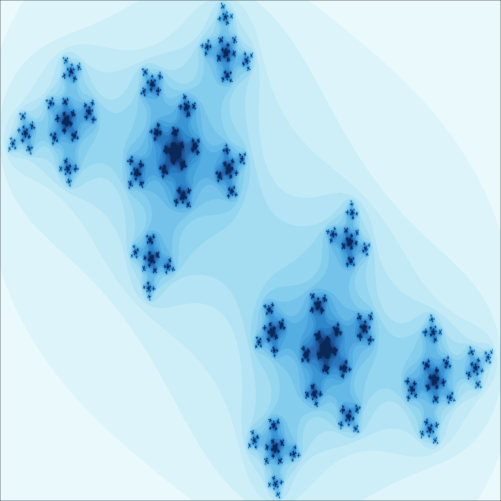

In [7]:
using Colors, ImageShow

N = 1000
iter = 20
w, h = N, N
q = [ComplexF32(r, i) for i=1:-(2.0/w):-1, r=-1.5:(3.0/h):1.5]
q_gpu = GpuArray(q)
result = GPUMOD.zeros(UInt8, size(q))
result .= juliaset.(q_gpu, iter)
cmap = colormap("Blues", iter + 1)
color_lookup(val, cmap) = cmap[val + 1]
color_lookup.(Array(result), (cmap,))